# Air Quality Analysis Report (2024)

## 📊 Project Title
**Global Air Quality Analysis (2024)**

## 🌍 Dataset Description
**Source:** [Kaggle - Global Air Quality (2024)](https://www.kaggle.com/datasets/youssefelebiary/air-quality-2024)  
**Content:** Daily air quality data from 6 major global cities in 2024.  
**Records:** 52,000+  
**Pollutants Tracked:** CO, CO₂, NO₂, SO₂, O₃, PM2.5, PM10  
**Index Used:** European AQI  
**Cities Covered:** London, Delhi, Sydney, Dubai, Cairo, Brasília  
**License:** MIT License

## Objective
To explore global air quality data, identify the most influential pollutants, compare city-level pollution, and predict AQI using machine learning models.


## Load Data

In [137]:
import pandas as pd
df = pd.read_csv('D:/Eliza/Eliza Portofolio/Python Project/Air_Quality.csv')

In [112]:
df.head()

Date      City     CO  CO2   NO2  SO2    O3  PM2.5  \
0  2024-01-01 00:00:00+00:00  Brasilia  323.0  NaN  23.8  2.8  42.0   12.0   
1  2024-01-01 01:00:00+00:00  Brasilia  318.0  NaN  21.9  2.7  40.0   12.5   
2  2024-01-01 02:00:00+00:00  Brasilia  309.0  NaN  19.2  2.6  39.0   12.1   
3  2024-01-01 03:00:00+00:00  Brasilia  295.0  NaN  16.3  2.4  38.0   11.4   
4  2024-01-01 04:00:00+00:00  Brasilia  270.0  NaN  13.0  2.1  40.0   10.2   

   PM10        AQI  
0  17.1  16.800000  
1  17.9  16.000000  
2  17.3  15.599999  
3  16.2  15.200000  
4  14.6  16.000000

In [113]:
df.tail()

Date    City     CO    CO2   NO2   SO2    O3  \
52699  2024-12-31 19:00:00+00:00  Sydney  106.0  448.0  15.5   6.4  26.0   
52700  2024-12-31 20:00:00+00:00  Sydney  112.0  449.0  15.7   8.3  29.0   
52701  2024-12-31 21:00:00+00:00  Sydney  115.0  449.0  14.7   9.8  36.0   
52702  2024-12-31 22:00:00+00:00  Sydney  113.0  447.0  11.8  10.7  53.0   
52703  2024-12-31 23:00:00+00:00  Sydney  107.0  443.0   7.8  11.3  74.0   

       PM2.5  PM10        AQI  
52699    9.7  13.0  19.199997  
52700   11.1  13.6  19.183330  
52701   11.5  15.1  19.274998  
52702   11.6  15.7  21.199999  
52703   12.6  17.1  29.600000

In [114]:
df.dtypes

Date      object
City      object
CO       float64
CO2      float64
NO2      float64
SO2      float64
O3       float64
PM2.5    float64
PM10     float64
AQI      float64
dtype: object

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   CO2     9648 non-null   float64
 4   NO2     52704 non-null  float64
 5   SO2     52704 non-null  float64
 6   O3      52704 non-null  float64
 7   PM2.5   52704 non-null  float64
 8   PM10    52704 non-null  float64
 9   AQI     52704 non-null  float64
dtypes: float64(8), object(2)
memory usage: 4.0+ MB


In [116]:
df.isnull().sum()
df['CO2'] = df['CO2'].fillna(df['CO2'].median())

In [117]:
df.duplicated().sum()

0

In [118]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()

In [119]:
df.describe()

CO           CO2           NO2           SO2            O3  \
count  52704.000000  52704.000000  52704.000000  52704.000000  52704.000000   
mean     258.258121    454.711293     24.102998     12.569869     60.025729   
std      159.589953     14.893070     19.363443     17.266623     38.217348   
min       52.000000    434.000000      0.000000      0.000000      0.000000   
25%      159.000000    453.000000      9.700000      2.300000     35.000000   
50%      213.000000    453.000000     18.900000      5.700000     54.000000   
75%      306.000000    453.000000     33.400000     16.800000     78.000000   
max     2045.000000    884.000000    165.900000    239.700000    349.000000   

              PM2.5          PM10           AQI         Month  
count  52704.000000  52704.000000  52704.000000  52704.000000  
mean      17.689931     35.643143     41.349339      6.513661  
std       15.670075     48.444774     26.626149      3.451267  
min        0.100000      0.100000      4.450000      1.000000  
25%        6.900000     10.200000     22.800000      4.000000  
50%       12.500000     18.900000     31.270835      7.000000  
75%       23.000000     37.500000     57.702089     10.000000  
max      129.500000    543.900000    196.633330     12.000000

## Exploratory Data Analysis (EDA)

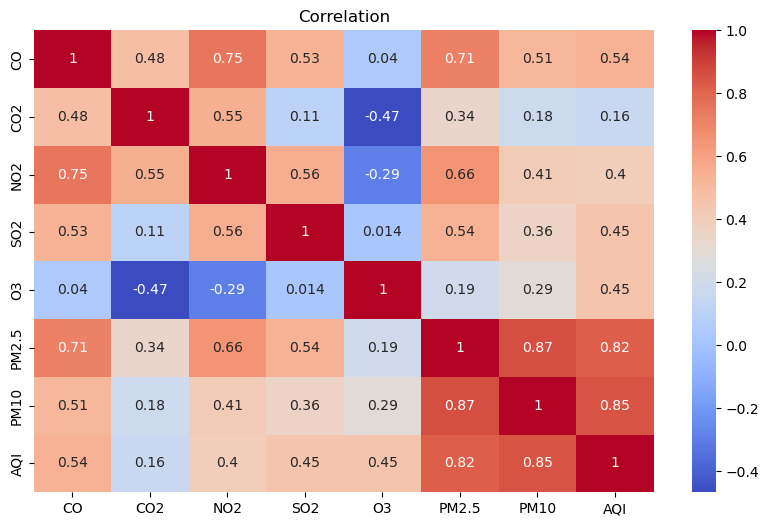

In [138]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation")
plt.show()

## Machine Learning Model

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = numeric_df.drop(columns=['AQI'])
y = numeric_df['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8056872052706053

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df[['CO', 'CO2', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']]
y = df['AQI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score: 0.814172141515369
Mean Squared Error: 125.8667491684105


In [127]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [128]:
import pandas as pd
importance = model.feature_importances_
pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)

Feature  Importance
6    PM10    0.784088
4      O3    0.092005
3     SO2    0.041081
5   PM2.5    0.029652
0      CO    0.024689
2     NO2    0.022107
1     CO2    0.006377

In [130]:
def evaluate_model(y_true, y_pred):
    from sklearn.metrics import r2_score, mean_squared_error
    print("R² Score:", r2_score(y_true, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_true, y_pred))

# Usage:
evaluate_model(y_test, y_pred)

R² Score: 0.9136944248917481
Mean Squared Error: 58.4573392954651


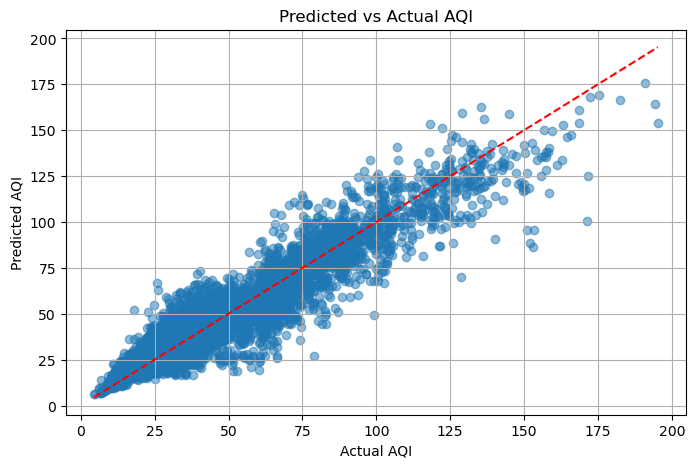

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Predicted vs Actual AQI")
plt.grid(True)
plt.show()

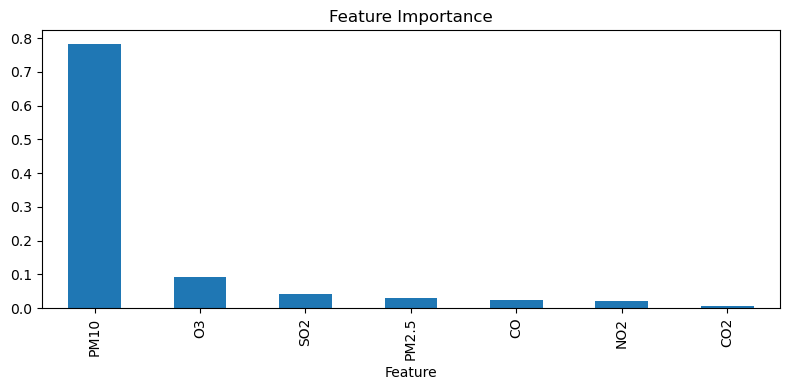

In [132]:
import pandas as pd

importance = model.feature_importances_
features = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
features.sort_values(by='Importance', ascending=False).plot.bar(x='Feature', y='Importance', legend=False, figsize=(8,4), title="Feature Importance")
plt.tight_layout()
plt.show()

In [133]:
import joblib
joblib.dump(model, "aqi_predictor_model.pkl")

['aqi_predictor_model.pkl']

<Axes: xlabel='City', ylabel='PM2.5'>

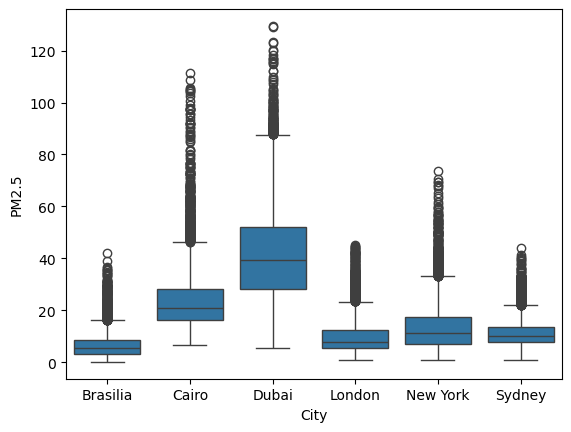

In [134]:
sns.boxplot(x='City', y='PM2.5', data=df)

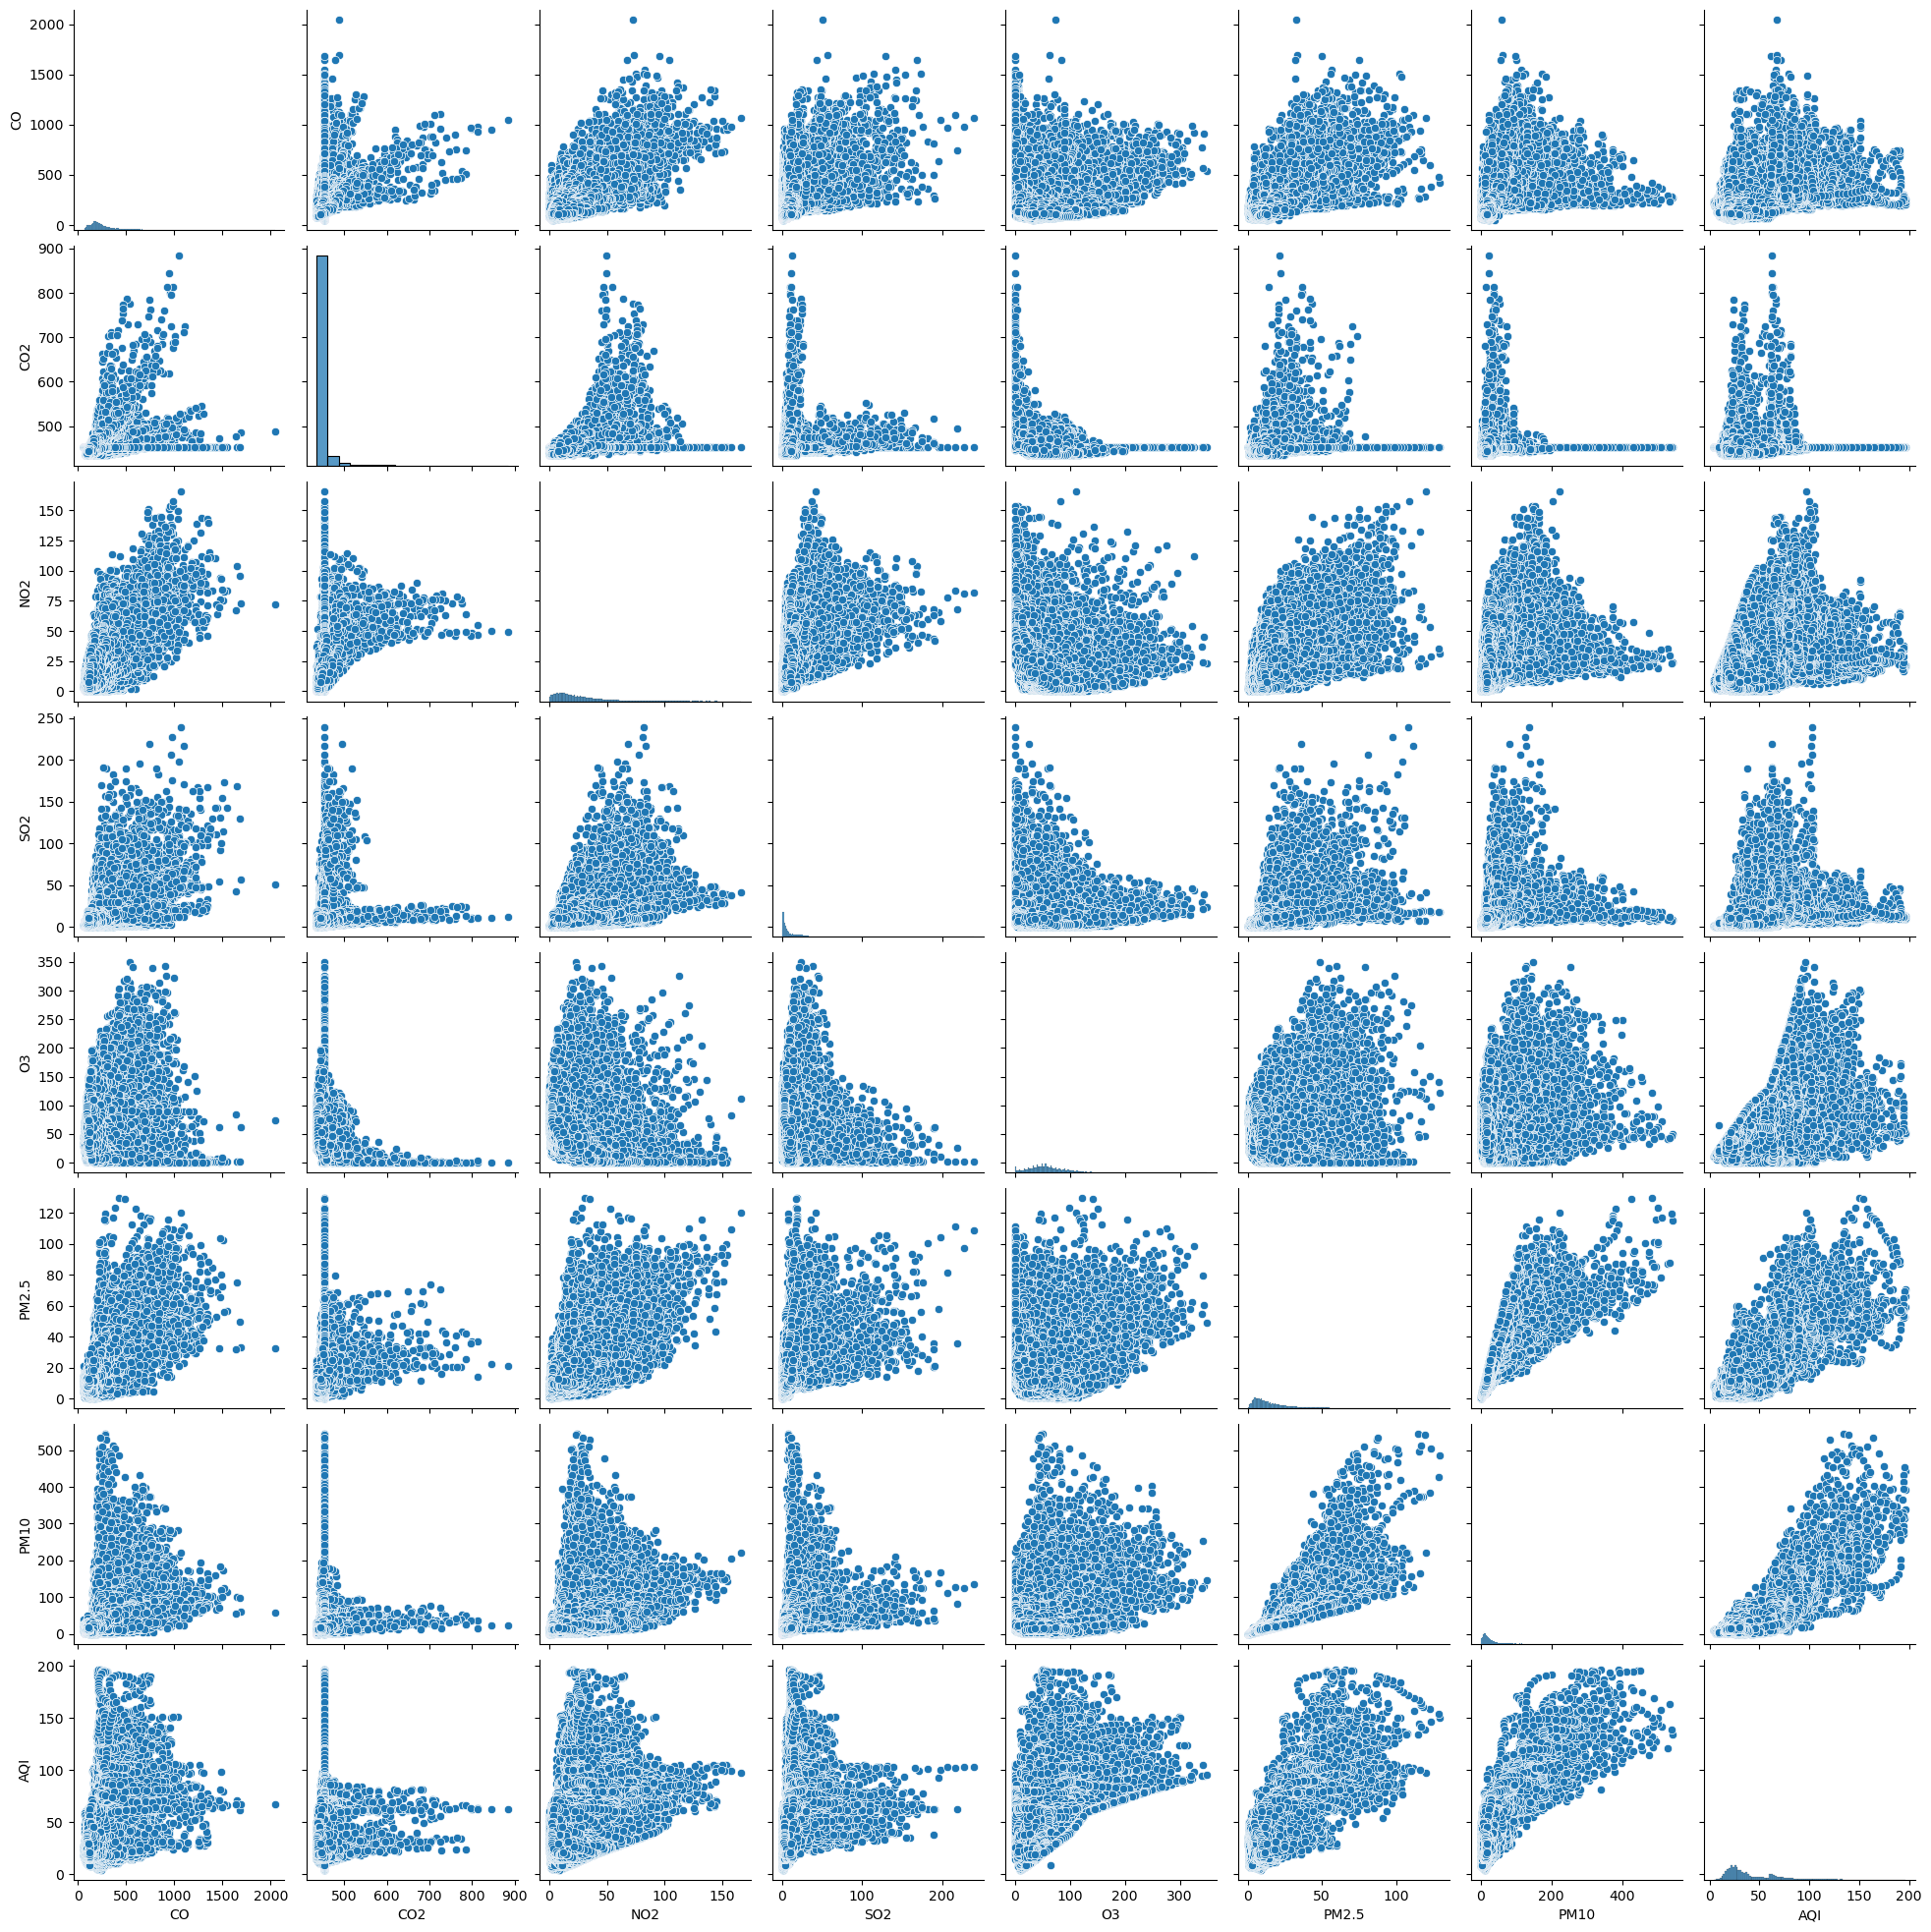

In [135]:
sns.pairplot(numeric_df)

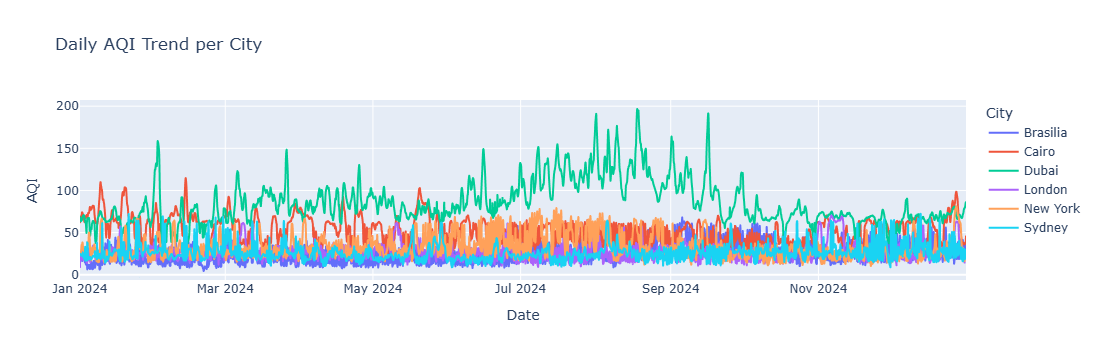

In [143]:
import plotly.express as px
fig = px.line(df, x='Date', y='AQI', color='City', title='Daily AQI Trend per City')
fig.update_layout(legend_title='City')
fig.show()

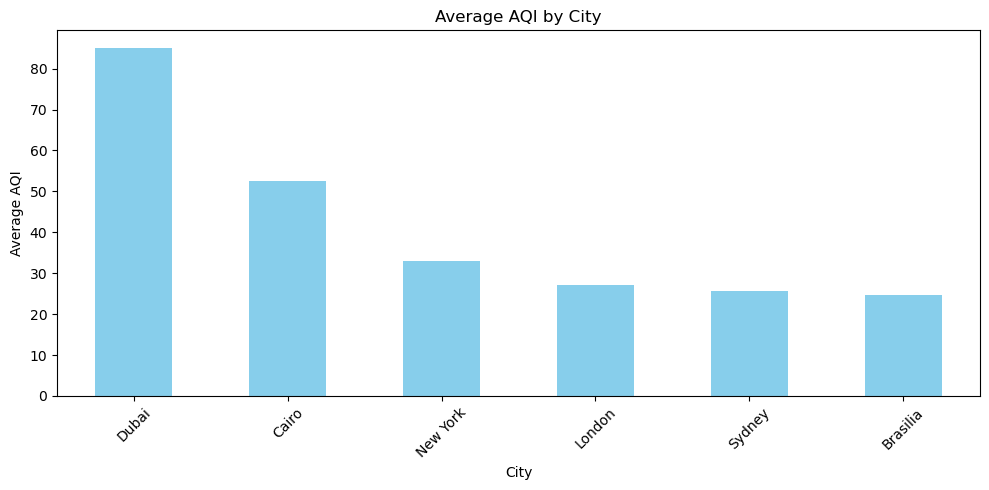

In [142]:
# Grouping AQI by city and calculating the average
avg_aqi_city = df.groupby('City')['AQI'].mean().sort_values(ascending=False)

# Plotting the result
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
avg_aqi_city.plot(kind='bar', color='skyblue')
plt.title('Average AQI by City')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [136]:
df.to_csv("Cleaned_Air_Quality.csv", index=False)

## Key Findings

PM10 is the strongest indicator of poor air quality.

Dubai had consistently high PM2.5 levels → health concern.

Predictive model (RandomForest) performed very well (R² ≈ 0.91).

